### Maxwell filter data with movement compensation
- Demonstrate movement compensation on simulated data. 
- The simulated data contains bilateral activation of auditory cortices, repeated over 14 different head rotations (head center held fixed).

In [2]:
from os import path as op
import mne
from mne.preprocessing import maxwell_filter
from mne.datasets.misc import data_path

In [3]:
data_path = op.join(data_path(verbose=True), 'movement')

Using default location ~/mne_data for misc...
[........................................] 100.00% ( 20.6 MB,   1.2 MB/s) |   
Verifying hash d822a720ef94302467cb6ad1d320b669.
Decompressing the archive: /home/reallocing/mne_data/mne-misc-data-0.3.tar.gz
(please be patient, this can take some time)
Successfully extracted to: ['/home/reallocing/mne_data/MNE-misc-data']


In [4]:
pos = mne.chpi.read_head_pos(op.join(data_path, 'simulated_quats.pos'))
raw = mne.io.read_raw_fif(op.join(data_path, 'simulated_movement_raw.fif'))
raw_stat = mne.io.read_raw_fif(op.join(data_path,'simulated_stationary_raw.fif'))

Opening raw data file /home/reallocing/mne_data/MNE-misc-data/movement/simulated_movement_raw.fif...
    Range : 25800 ... 34208 =     42.956 ...    56.955 secs
Ready.
Current compensation grade : 0
Opening raw data file /home/reallocing/mne_data/MNE-misc-data/movement/simulated_stationary_raw.fif...
    Range : 25800 ... 34208 =     42.956 ...    56.955 secs
Ready.
Current compensation grade : 0


In [14]:
print("pos shape:",pos.shape)
print("part of pos:",pos[0,:])

('pos shape:', (14, 10))
('part of pos:', array([  4.29560000e+01,   2.58820000e-01,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         4.00000000e-02,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00]))


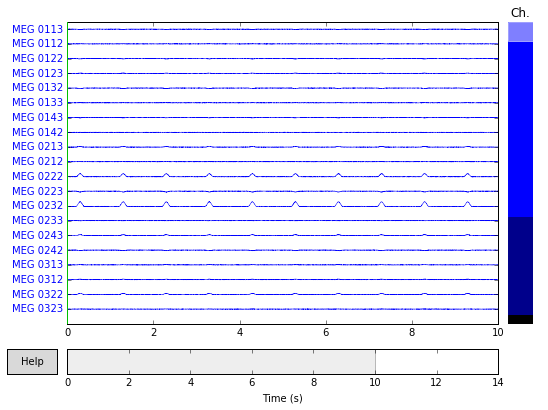

In [11]:
raw_stat.plot();

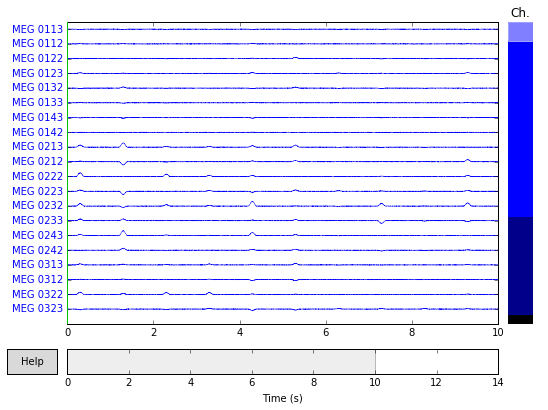

In [9]:
raw.plot();

#### Process our simulated raw data (taking into account head movements)

In [17]:
events = mne.find_events(raw,stim_channel='STI 014')
events

14 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]


array([[25920,     0,     1],
       [26520,     0,     2],
       [27120,     0,     3],
       [27720,     0,     4],
       [28320,     0,     5],
       [28920,     0,     6],
       [29520,     0,     7],
       [30120,     0,     8],
       [30720,     0,     9],
       [31320,     0,    10],
       [31920,     0,    11],
       [32520,     0,    12],
       [33120,     0,    13],
       [33720,     0,    14]])

In [6]:
# set all event_id = 1
events[:,2] = 1
events

array([[25920,     0,     1],
       [26520,     0,     1],
       [27120,     0,     1],
       [27720,     0,     1],
       [28320,     0,     1],
       [28920,     0,     1],
       [29520,     0,     1],
       [30120,     0,     1],
       [30720,     0,     1],
       [31320,     0,     1],
       [31920,     0,     1],
       [32520,     0,     1],
       [33120,     0,     1],
       [33720,     0,     1]])

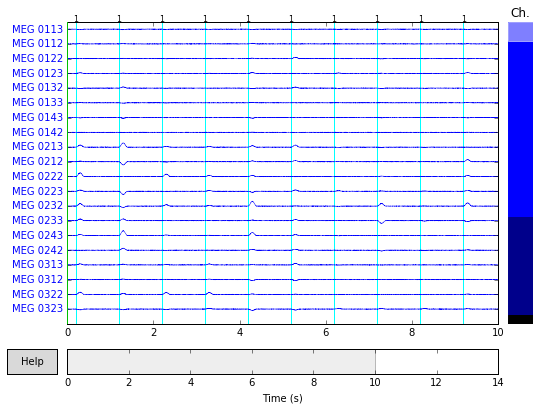

In [8]:
raw.plot(events=events);

In [19]:
## 定义画地形图（topomap）时的参数
topo_kwargs = dict(times=[0, 0.1, 0.2], ch_type='mag', vmin=-500, vmax=500)

#### 0. Take average of stationary data (bilateral auditory patterns

1 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


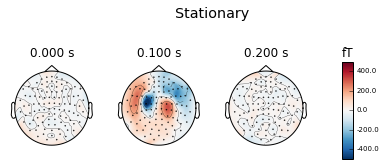

In [20]:
evoked_stat = mne.Epochs(raw_stat,events,event_id=1,tmin=-0.2,
                        tmax=0.8).average()
evoked_stat.plot_topomap(title='Stationary',**topo_kwargs);

#### 1. Take a naive average (smears activity)

1 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


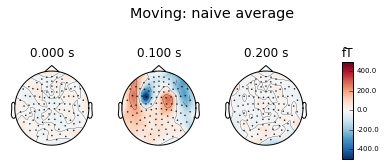

In [21]:
evoked = mne.Epochs(raw,events,1,-0.2,0.8).average()
evoked.plot_topomap(title='Moving: naive average', **topo_kwargs);

#### 2. Use raw movement compensation (restores pattern)

Maxwell filtering raw data
    Appending head position result channels and loading raw data from disk
    No bad MEG channels
    Processing 203 gradiometers and 102 magnetometers
    Automatic origin fit: head of radius 91.0 mm
    Using origin -4.1, 16.0, 51.7 mm in the head frame
        Using 90/95 harmonic components for    0.000  (75/80 in, 15/15 out)
    Processing 1 data chunk
        Using 87/95 harmonic components for    0.000  (72/80 in, 15/15 out)
        Using 88/95 harmonic components for    1.001  (73/80 in, 15/15 out)
        Using 90/95 harmonic components for    2.000  (75/80 in, 15/15 out)
        Using 88/95 harmonic components for    3.000  (73/80 in, 15/15 out)
        Using 88/95 harmonic components for    3.999  (73/80 in, 15/15 out)
        Using 88/95 harmonic components for    5.000  (73/80 in, 15/15 out)
        Using 89/95 harmonic components for    6.001  (74/80 in, 15/15 out)
        Using 93/95 harmonic components for    6.999  (78/80 in, 15/15 out)
    

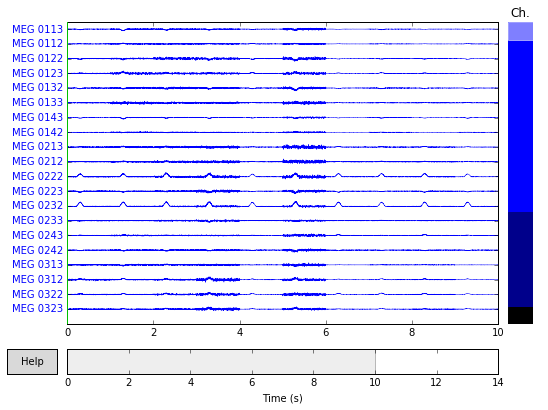

In [22]:
raw_sss = maxwell_filter(raw,head_pos=pos)
raw_sss.plot();

1 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


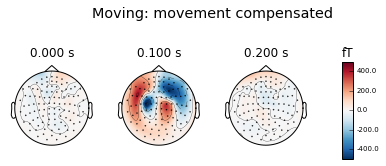

In [23]:
evoked_raw_mc = mne.Epochs(raw_sss,events,1,-0.2,0.8).average()
evoked_raw_mc.plot_topomap(title='Moving: movement compensated', **topo_kwargs);

### Ref
- https://mne-tools.github.io/0.13/auto_examples/preprocessing/plot_movement_compensation.html#sphx-glr-auto-examples-preprocessing-plot-movement-compensation-py
- [Max filter](https://mne-tools.github.io/dev/manual/preprocessing/maxwell.html)